<a href="https://colab.research.google.com/github/neel-machine/LDA_Topic_Modelling/blob/main/LDA_topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load Data

Data is in csv file , loading into a dataframe


In [39]:
df = pd.read_csv('amazon_ring_appstore_reviews_2000.csv')
df.head()

,Unnamed: 0,userName,isEdited,date,title,rating,review,developerResponse
0,0,Huynh Family iTunes,False,2017-10-21 14:48:08,Ring is the answer to every mothers desire to have a doorbell that doesn’t wake a baby,5,"I have many ring products that all tie together seamlessly into this app. The video doorbell, new spotlight cam, stick up cam, and the brand new security system. My family, pets and I feel safe away on trips and feel like we have a great prevention from break ins. With the low cost of the video storage for all of our video devices I am always aware of what goes on in or around my house at all times. I feel secure and never have any issues setting up, connecting or using their devices. They all integrate wonderfully and I could not be happier. I have recommended to many friends and family members to get just a ring video doorbell. As a new mom with dogs it was hard when anytime someone rang, packages, whatever, our dogs would wake our baby. Now with Chime, I set a tone that doesn’t illicit barking and am aware when anyone is at the door or rings the doorbell. The motion detection is amazing and really easy to customize to not get everyone hat walks by, or you can if that’s what you want. Absolutely love this company and their products. Every time they come up with something new I’m pleased with how well thought out it is and how well it integrates.",NaN
1,1,581 Ford,False,2018-08-17 23:10:13,Ring 2 not ready for prime time,2,"I have a Ring 2 that’s almost worthless. I am receiving alerts but they’re several seconds delayed. My settings are set to be as fast and sensitive as possible. Same problem many other of your other customers complain about. I wish you would at least have the option of turning off the 10 minute timer that shuts down live view. Should be the customers decision to drain the battery in live view. That’s why I bought an extra battery. Also, one of the times I tried calling you I was given the option of making an appointment for you to call me back but you never did. And Kaitlyn@Ring, don’t bother to paste your typical reply telling me to email you because you’re so concerned. I’ve read your response back to other customers so many times that I’ve memorized it. Customers should realize if you have to paste that same cookie cutter reply addressing everyone’s concern then Ring and your customers have a really big problem. I’m connected to my 2.4 GHz network and hitting roughly 8Mbps at -53 dBm power. Being an engineer I realize that the business unit and marketing/sales have more say than the technical staff at most companies. The technical people rarely want to release the product before it’s ready but the business side always makes that happen which is why your commercials on TV are so great but your product has a lot to be desired. And you Kaitlyn, I’m not sure which side of the house you’re on but I hope they’re paying you well.","{'id': 4737887, 'body': 'Hi 581 Ford, \n\nI do apologize for this poor Ring experience. I understand your frustration and really would like to help with resolving this for you. I would like to connect with you so that I can address your issues further. If you do decide to reach out to me, I am eager and ready to get to the bottom of this for you. \n\nThanks, \n\nKaitlyn R., Customer Satisfaction Specialist\nKaitlyn.rosenthal@ring.com', 'modified': '2018-08-20T18:12:57Z'}"
2,2,Hcjfjfifufuf,False,2022-09-09 22:04:57,Ring Ring...,2,"Update; Smart Alerts is horrible, it will not always detect and alert you of a person & sometimes family will be in house before even getting alert. Suggest turning it off- it needs a major rework. \n\nUpdate; Now it says person is detected and by time I can view the video is just gone, like it never happen. I saw a person in the preview.. now I will never know what they was doing. Issues with Loading. Resolution is awful. I have certifications in networking, I am skilled in getting very good connections and fixing connection issues. With all of my

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         140 non-null    int64 
 1   userName           140 non-null    object
 2   isEdited           140 non-null    bool  
 3   date               140 non-null    object
 4   title              140 non-null    object
 5   rating             140 non-null    int64 
 6   review             140 non-null    object
 7   developerResponse  23 non-null     object
dtypes: bool(1), int64(2), object(5)
memory usage: 7.9+ KB


In [ ]:
pd.set_option('display.max_colwidth',None)
df.review[:5]


# Prepare text for topic modelling

There are no null reviews,we have 140 reviews in total . Lets make the review text lowercase, remove stopwords, remove punctuations and apply lemmatisation.

In [18]:
import nltk,re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
from pandas.core.reshape.merge import string
df.rating = df.rating.astype(str)

def clean_text(text):
  text = text.lower()
  text = re.sub(r'[%s]'%re.escape(string.punctuation),'',text) 
  #print(text)
  return text

clean_text('I am super,* gir''l')





'i am super girl'

In [ ]:
df.review = df.review.apply(lambda txt:clean_text(txt))
df.review[:5]

In [38]:
stop_wrds = stopwords.words('english')
def remove_stopwords(txt):
  #print(txt)
  clean_txt = " ".join([wrd for wrd in txt.split() if wrd not in stop_wrds])
  return clean_txt

remove_stopwords('The city of hyderabad')


'The city hyderabad'

In [42]:
df.review = df.review.apply(lambda x:remove_stopwords(x))
df.review[1]

'ring 2 that’s almost worthless receiving alerts they’re several seconds delayed settings set fast sensitive possible problem many customers complain wish would least option turning 10 minute timer shuts live view customers decision drain battery live view that’s bought extra battery also one times tried calling given option making appointment call back never kaitlynring don’t bother paste typical reply telling email you’re concerned i’ve read response back customers many times i’ve memorized customers realize paste cookie cutter reply addressing everyone’s concern ring customers really big problem i’m connected 24 ghz network hitting roughly 8mbps 53 dbm power engineer realize business unit marketingsales say technical staff companies technical people rarely want release product it’s ready business side always makes happen commercials tv great product lot desired kaitlyn i’m sure side house you’re hope they’re paying well'

Lets create a lemmatiser. A lemmatiser converts a word into its base form for eg ringing to ring.

In [43]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()
all = []
def lemma(txt):
  doc = nlp(txt)
  for wrd in doc:
    all.append(wrd.lemma_)

  return " ".join(all)

lemma('My phone is ringing in mornings')


'my phone be ring in morning'

In [44]:
df.review = df.review.apply(lambda x: lemma(x))
df.review[1]

'my phone be ring in morning many ring product tie together seamlessly app video doorbell new spotlight cam stick cam brand new security system family pet feel safe away trip feel like great prevention break in low cost video storage video device always aware go around house times feel secure never issue set connect use device integrate wonderfully could happier recommend many friend family member get ring video doorbell new mom dog hard anytime someone ring package whatever dog would wake baby chime set tone do not illicit bark aware anyone door ring doorbell motion detection amazing really easy customize get everyone hat walk that ’ want absolutely love company product every time come something new I ’m pleased well thought well integrate ring 2 that ’ almost worthless receiving alert they ’re several second delay setting set fast sensitive possible problem many customer complain wish would least option turn 10 minute timer shut live view customer decision drain battery live view tha

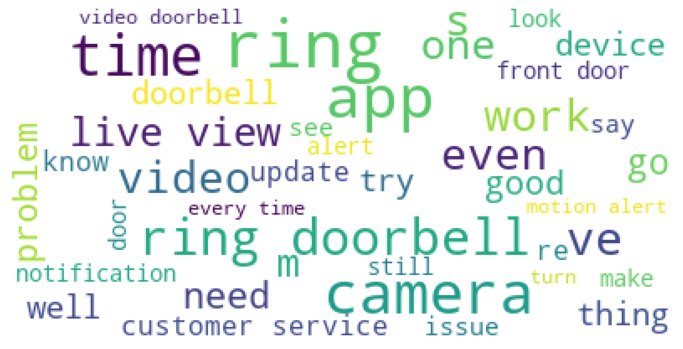

In [45]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=40,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df.review))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();